In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank.csv
/kaggle/input/bank-marketing/bank-full.csv



# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">WorkFlow and Contents 📖</p>

<div style="justify-content: center; align-items: center; background-color:#272727; padding: 10px; border-radius: 25px;">
    <h1 style="font-family: 'OCR A Extended', sans-serif; font-size: 30px; color: White;  margin-top: 9px; margin-bottom: 9px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">
        <center>
            Bank Marketing Campaign 🔍 | <span style="color: #0000ff;">EDA</span> + <span style="color: #0000ff;">Predictions</span> 📈
        </center>
    </h1>
</div>

<center>
        <img src="https://guardian.ng/wp-content/uploads/2016/12/Global-banking.jpg" width=500>
</center>

----------------------------
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">Introduction 📖</p>
​
<div style="border: 2px solid darkblue; border-radius: 10px; padding: 10px;">
    <span style="font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
     <ul>
         <li><strong><code>About Dataset</code>:</strong> </li>
         <li>This Data is Related to Direct Marketing Campaigns (Phone Calls) of a Portuguese banking institution.</li>
         <li>The marketing campaigns were based on phone calls.</li>
         <li>Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.</li>
         <li>The classification goal is to predict if the client will subscribe a term deposit variable (y).</li>
</ul>
    </span>
</div>


# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">Table of Contents 📑</p>

> - [1 - Import Libraries 📚](#1)
> - [2 - Missing Data Imputation 🔎](#2)
> - [3 - Exploratory Data Analysis 📊](#3)
>    - [3.1- Univariate Analysis on Categorical Features](#3.1)
>    - [3.2- Bivariate Analysis on Categorical Features](#3.2)
>    - [3.3- Univariate Analysis on Numerical Features](#3.3)
>    - [3.4- Bivariate Analysis on Numerical Features](#3.4)
> - [4 - Data Preprocessing ⚒️](#4)
>    - [4.1- Feature Extraction](#4.1)
>    - [4.2- Handling Outliers](#4.2)
>    - [4.3- Data Split to Train and Test Sets](#4.3)
>    - [4.4- Handling Imbalanced Data](#4.4)
>    - [4.5- Feature Scaling](#4.5)
> - [5- Models Training and Evaluation ⚙️](#5)
>    - [5.1- K-fold Cross-Validation Evaluation](#5.1)
>    - [5.2- Training the Chosen Model (CatBoost Classifier)](#5.2)
> - [6- Hyperparameter Tuning 🛠️](#6)
>    - [6.1- ROC Curve for Final Model (CatBoost Classifier)](#6.1)
> - [7- Submission💡](#7)

---------------------------------------
<a class="anchor"  id="1"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">1- Import Libraries 📚</p>

In [2]:
# Installing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Getting the Dataset Path
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/bank-marketing/bank.csv
/kaggle/input/bank-marketing/bank-full.csv


In [4]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


In [5]:
## handling Outliers Libraries
from datasist.structdata import detect_outliers

In [6]:
# Importing the Dataset from the ucimlrepo
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [7]:
from ucimlrepo import fetch_ucirepo

In [8]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [9]:
X.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN


In [10]:
print('{} Observations and {} features'.format(X.shape[0],X.shape[1]))

45211 Observations and 16 features


#### About Dataset
* This Data is Related to Direct Marketing Campaigns (Phone Calls) of a Portuguese banking institution
* The marketing campaigns were based on phone calls
* Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
* The classification goal is to predict if the client will subscribe a term deposit (variable y)


-------------------
<a class="anchor"  id="2"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">2- Missing Data Imputation 🔎</p>

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


Clean the Nan values and fix the datatype 

In [12]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [13]:
## categorical feature - Missing Value
X[['job','education','contact','poutcome']]

,job,education,contact,poutcome
0,management,tertiary,NaN,NaN
1,technician,secondary,NaN,NaN
2,entrepreneur,secondary,NaN,NaN
3,blue-collar,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
45206,technician,tertiary,cellular,NaN
45207,retired,primary,cellular,NaN
45208,retired,secondary,cellular,success
45209,blue-collar,secondary,telephone,NaN


In [14]:
# Fixing the Nan value for Job 
# There are 288 Nan values for Job feature
frequency = X.job.value_counts(dropna=False).to_frame()
frequency

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [15]:
relative_freq = X.job.value_counts(dropna=False,normalize=True).to_frame()
relative_freq

,proportion
job,
blue-collar,0.215257
management,0.209197
technician,0.168034
admin.,0.114375
services,0.091880
retired,0.050076
self-employed,0.034925
entrepreneur,0.032890
unemployed,0.028820


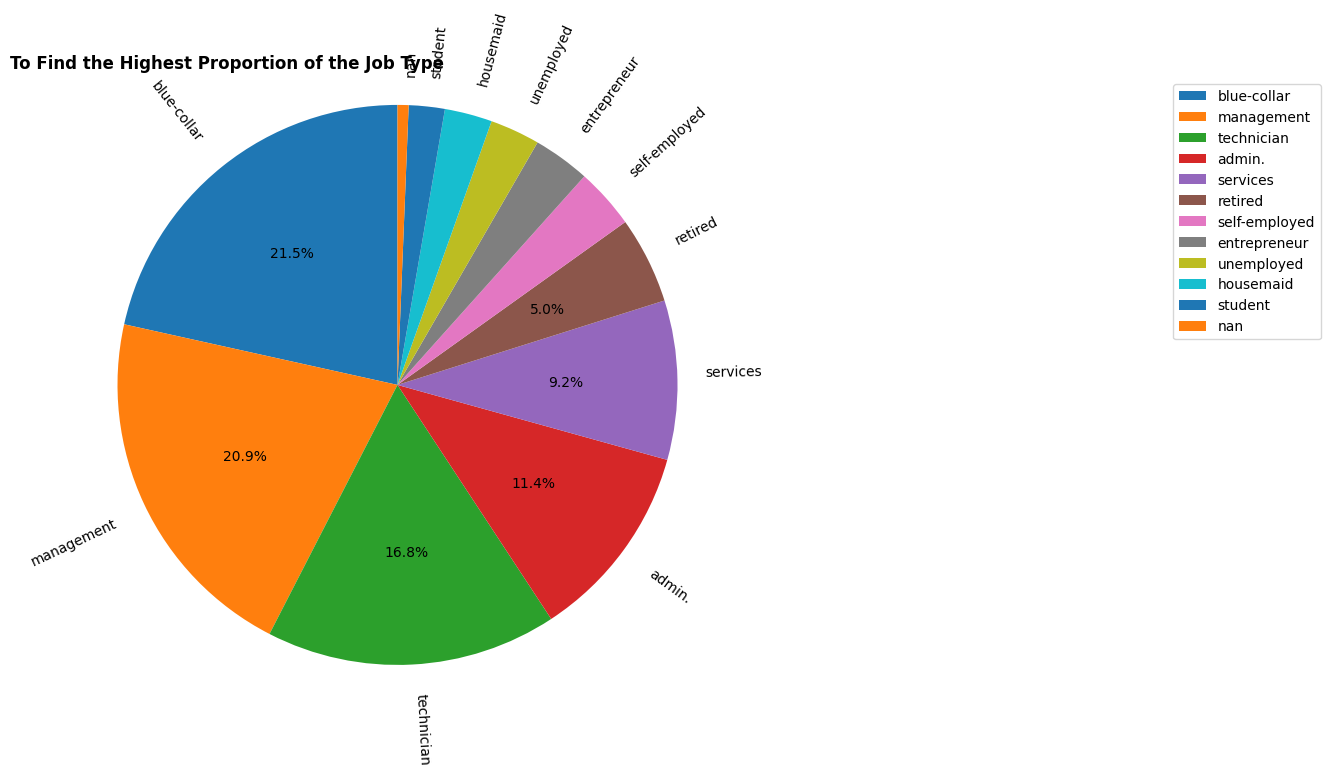

In [16]:
## Calculate the Relative Frequency
fig = plt.figure(figsize=(10,8))
def my_autopct(pct):
    return f'{pct:.1f}%' if pct > 5 else ''
#'%1.1f%%'
plt.pie(frequency['count'],labels=frequency.index,radius=2,rotatelabels=10,startangle=90,autopct=my_autopct,pctdistance=0.6)
plt.legend(loc="upper right", bbox_to_anchor=(1.7, 1))
plt.axis('equal')
plt.title("To Find the Highest Proportion of the Job Type",loc='left',weight='bold')
plt.show()

In [17]:
X['target'] = y

In [18]:
## Group the Education Type and Job Type
X.groupby(['job','education'],)['target'].value_counts().unstack().sort_index(axis=1)

target                     no   yes
job           education            
admin.        primary     197    12
              secondary  3717   502
              tertiary    473    99
blue-collar   primary    3540   218
              secondary  4938   433
              tertiary    125    24
entrepreneur  primary     171    12
              secondary   490    52
              tertiary    634    52
housemaid     primary     578    49
              secondary   361    34
              tertiary    151    22
management    primary     272    22
              secondary  1024    97
              tertiary   6667  1134
retired       primary     617   178
              secondary   777   207
              tertiary    265   101
self-employed primary     125     5
              secondary   534    43
              tertiary    699   134
services      primary     316    29
              secondary  3161   296
              tertiary    177    25
student       primary      28    16
              secondary   357   151
              tertiary    164    59
technician    primary     145    13
              secondary  4711   518
              tertiary   1682   286
unemployed    primary     223    34
              secondary   620   108
              tertiary    233    56

In [19]:
X.groupby(['job'],)['target'].value_counts().unstack().sort_index(axis=1,ascending=False) \
 .unstack().to_frame() \
 .rename(columns={0:'count'})  \
 .sort_values(by='count',ascending=False)

count
target job                 
no     blue-collar     9024
       management      8157
       technician      6757
       admin.          4540
       services        3785
       retired         1748
       self-employed   1392
       entrepreneur    1364
yes    management      1301
no     housemaid       1131
       unemployed      1101
yes    technician       840
       blue-collar      708
no     student          669
yes    admin.           631
       retired          516
       services         369
       student          269
       unemployed       202
       self-employed    187
       entrepreneur     123
       housemaid        109

In [20]:
## Calculate the Median or Mean for the Balance Feature for each Job Category 
# Balance Feature - average yearly balance, in euros (numeric)
average_salary = X.groupby('job')[['balance']].median().rename(columns={'balance':'Median_balance'})
average_salary

,Median_balance
job,
admin.,396.0
blue-collar,388.0
entrepreneur,352.0
housemaid,406.0
management,572.0
retired,787.0
self-employed,526.0
services,339.5
student,502.0


<Axes: xlabel='job'>

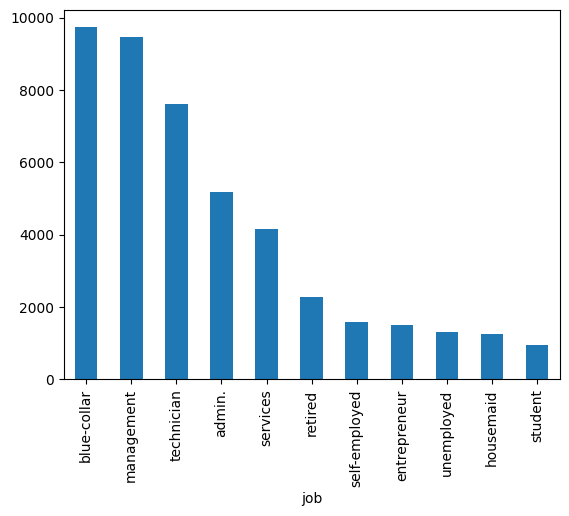

In [21]:
X.job.value_counts().plot(kind='bar')

In [22]:
X.groupby('job')[['housing']].value_counts()

job            housing
admin.         yes        3182
               no         1989
blue-collar    yes        7048
               no         2684
entrepreneur   yes         869
               no          618
housemaid      no          842
               yes         398
management     no         4780
               yes        4678
retired        no         1773
               yes         491
self-employed  no          814
               yes         765
services       yes        2766
               no         1388
student        no          689
               yes         249
technician     yes        4115
               no         3482
unemployed     no          760
               yes         543
Name: count, dtype: int64

In [23]:
#X[X['job'].isnull()]['housing'].value_counts()
## Total Null Values in job based subgroup of the Housing feature
X[X['job'].isnull()]['housing'].value_counts()

housing
no     262
yes     26
Name: count, dtype: int64

In [24]:
## Filling the Missing value in Job as - Missing Category

In [25]:
X['job'].fillna('Missing',inplace=True)

/tmp/ipykernel_19/2405553864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'].fillna('Missing',inplace=True)


In [26]:
X[['education','contact','poutcome']]

,education,contact,poutcome
0,tertiary,NaN,NaN
1,secondary,NaN,NaN
2,secondary,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
45206,tertiary,cellular,NaN
45207,primary,cellular,NaN
45208,secondary,cellular,success
45209,secondary,telephone,NaN


In [27]:
X[['education']].value_counts(dropna=False)

education
secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: count, dtype: int64

In [28]:
X.groupby('education')['job'].value_counts()

education  job          
primary    blue-collar      3758
           retired           795
           housemaid         627
           services          345
           management        294
           unemployed        257
           admin.            209
           entrepreneur      183
           technician        158
           self-employed     130
           Missing            51
           student            44
secondary  blue-collar      5371
           technician       5229
           admin.           4219
           services         3457
           management       1121
           retired           984
           unemployed        728
           self-employed     577
           entrepreneur      542
           student           508
           housemaid         395
           Missing            71
tertiary   management       7801
           technician       1968
           self-employed     833
           entrepreneur      686
           admin.            572
           retired

In [29]:
## Using the Forward Fill to fill the Null values in Education
X['education'].fillna(method='ffill',inplace=True)

/tmp/ipykernel_19/3788858907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'].fillna(method='ffill',inplace=True)


In [30]:
X['education'].value_counts(dropna='False')

education
secondary    24165
tertiary     13886
primary       7160
Name: count, dtype: int64

In [31]:
X['contact'].value_counts(dropna=False)

contact
cellular     29285
NaN          13020
telephone     2906
Name: count, dtype: int64

In [32]:
X[X['contact'].isnull()].groupby('job')

Contact Feature - contact communication type

In [33]:
X.groupby('contact')['duration'].mean()

contact
cellular     263.013966
telephone    235.366139
Name: duration, dtype: float64

In [34]:
X['contact'].fillna('cellular',inplace=True)

/tmp/ipykernel_19/2682905949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['contact'].fillna('cellular',inplace=True)


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  target       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Poutcome Feature - outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

In [36]:
X['poutcome'].value_counts(dropna=False)

poutcome
NaN        36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [37]:
X.groupby('poutcome')['job'].value_counts().unstack()

job,Missing,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
poutcome,,,,,,,,,,,,
failure,20,643,1068,164,97,1044,230,165,444,117,797,112
other,2,241,401,39,26,393,83,61,177,81,299,37
success,11,204,148,22,29,387,174,55,85,87,245,64


In [38]:
## Get the Maximum Index for all the Job Type
X.groupby('poutcome')['job'].value_counts().unstack().idxmax(axis=0)

job
Missing          failure
admin.           failure
blue-collar      failure
entrepreneur     failure
housemaid        failure
management       failure
retired          failure
self-employed    failure
services         failure
student          failure
technician       failure
unemployed       failure
dtype: object

How many unknown values in each job type for poutcome feature

In [39]:
# Total Null values of Poutcome based on the subgroup of job type feature
X[X['poutcome'].isnull()]['job'].value_counts()

job
blue-collar      8115
management       7634
technician       6256
admin.           4083
services         3448
retired          1777
self-employed    1298
entrepreneur     1262
unemployed       1090
housemaid        1088
student           653
Missing           255
Name: count, dtype: int64

In [40]:
X.fillna('failure',inplace=True)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  target       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


-----------------------------------------
<a class="anchor"  id="3"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">3- Exploratory Data Analysis 📊</p>

In [42]:
# Descriptive Summary for Numerical features
X.describe(include='int64')

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [43]:
X.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,24165,44396,25130,37967,42305,13766,41860,39922


# Let's Discuss the Categorical features 
* Job: Type of Job --> **Ordinal Feature**
* Marital: marital status --> Have to identify if this is treated as Ordinal Feature or Nomial Feature.
                            Have to Check if any impact with Target Variable and following pattern
* Education: --> **Ordinal Feature**
* Default: has credit in default (yes or No): **Binary Categorical Feature**
* Housing: has housing loan? (binary: "yes","no") --> **Binary Categorical Feature**
* Loan: has personal loan? (binary: "yes","no") --> **Binary Categorical Feature**
* Month: month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") --> **Cyclic Categorical Variable**

*For Decision and Random Forest we can handle the Raw Categorical Feature, no need for label Encoding or One Hot Encoding for categorical features*
* **Job Type**       -- Ordinal Feature
* **Marital Status** -- Ordinal Feature
* **Education** -- Ordinal Feature
* **Month** Cyclic Feature


Univariate Analysis on Categorical Variable
-----------------------------------------
<a class="anchor"  id="3.1"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">3.1- Univariate Analysis on Categorical Features 📊</p>

Text(0.5, 1.0, 'Job Type Distribution')

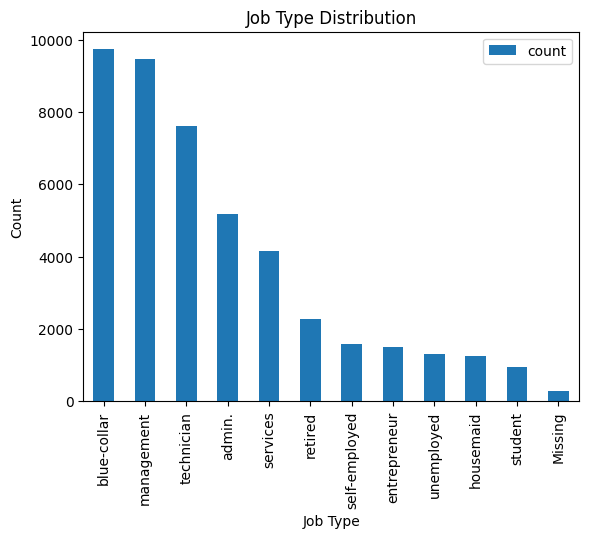

In [44]:
# Bar Graph to see the Distribution of Job Category
X.job.value_counts().to_frame().plot(kind='bar')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Job Type Distribution')

Text(0.5, 1.0, 'Marital Status Distribution')

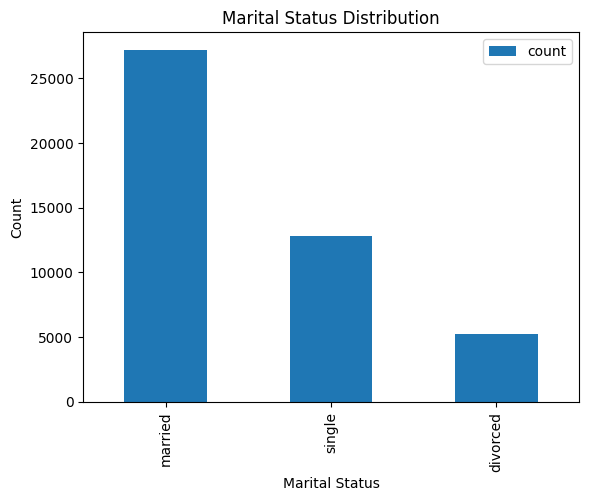

In [45]:
X.marital.value_counts().to_frame().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')

Text(0.5, 1.0, 'Education Type Distribution')

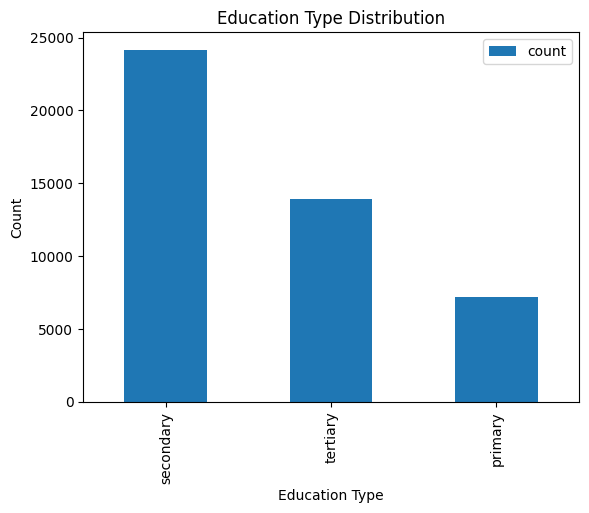

In [46]:
X.education.value_counts().to_frame().plot(kind='bar')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.title('Education Type Distribution')

Text(0.5, 1.0, 'Credit Yes or No Distribution')

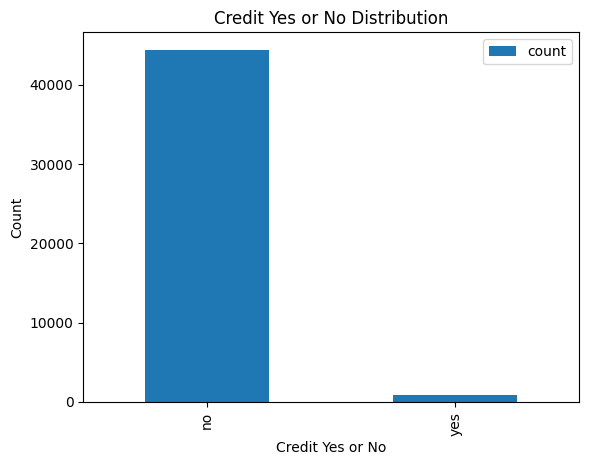

In [47]:
X.default.value_counts().to_frame().plot(kind='bar')
plt.xlabel('Credit Yes or No')
plt.ylabel('Count')
plt.title('Credit Yes or No Distribution')

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>The target feature is Imbalanced.</li>
</ul>
    
</div>

In [48]:
X.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [49]:
X.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [50]:
X.contact.value_counts()

contact
cellular     42305
telephone     2906
Name: count, dtype: int64

Text(0.5, 1.0, 'Month Distribution')

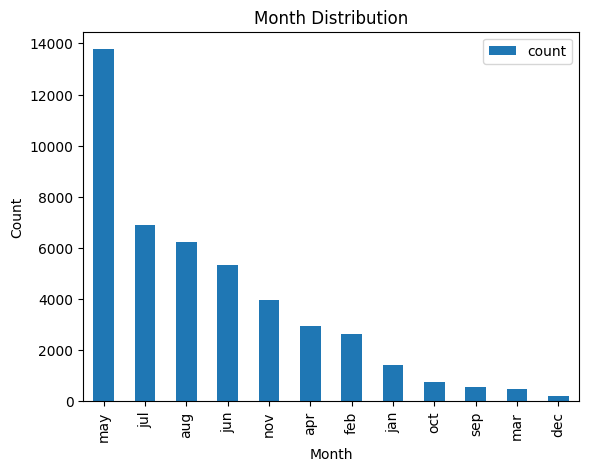

In [51]:
X.month.value_counts().to_frame().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Distribution')

Text(0.5, 1.0, 'Previous Outcome for Marketing Campaign')

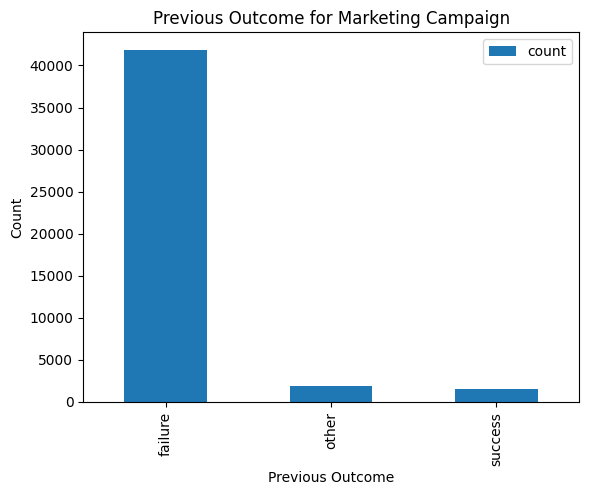

In [52]:
X.poutcome.value_counts().to_frame().plot(kind='bar')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.title('Previous Outcome for Marketing Campaign')

-----------------------------------------
<a class="anchor"  id="3.2"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">3.2- Bivariate Analysis on Categorical Features 📊</p>

* Check is there any impact or Influence on subscribing the Term Deposit based on the Job Type or education - Find any **pattern** following on this categorical features
* Group the Job Type based on Average Yearly Balance

Text(0.5, 1.0, 'Term Deposit Subscription Based on Job Type')

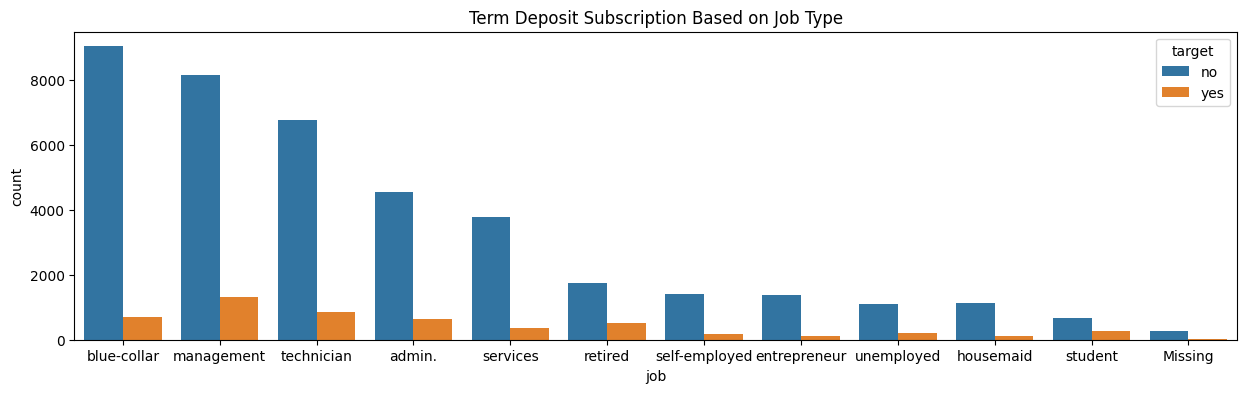

In [53]:
plt.figure(figsize=(15,4))
sns.countplot(data=X,x='job',hue='target',order=X.job.value_counts().to_frame().index)
plt.title('Term Deposit Subscription Based on Job Type')

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li> Basically the Unsubscribed Frequency is more when compare to the Subscribed Frequency, seems like data is imbalanced
    <li>
        Most of the Clients not subscribed the Term Deposit are from Job Type
        **Blue-Collar**
        **Management**
        **Technician**
    </li>
    <li>
        Inference is that - may be low paying job Clients have not subscribed the Term Deposit
    </li>
</ul>

In [54]:
## Average balance grouping by the Job Type
X.groupby('job')[['balance']].mean().sort_values('balance',ascending=False)

,balance
job,
retired,1984.215106
Missing,1772.357639
management,1763.616832
self-employed,1647.970868
unemployed,1521.745971
entrepreneur,1521.470074
housemaid,1392.395161
student,1388.060768
technician,1252.632092


Check if education feature have any impact in subscribing the Term Deposit

<Axes: xlabel='education', ylabel='count'>

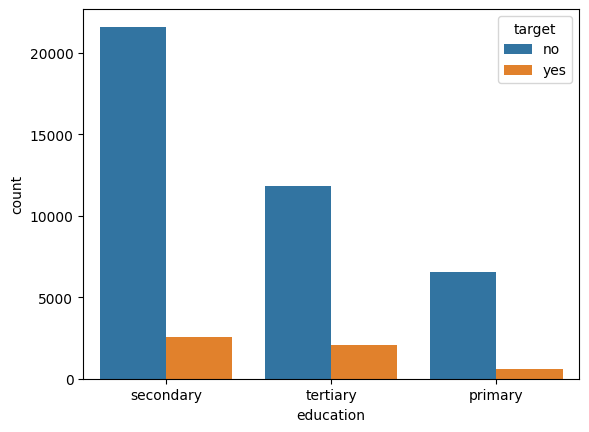

In [55]:
sns.countplot(data=X,x='education',hue='target',order=X.education.value_counts().to_frame().index)

Check if the client has already taken housing or personal loan has impacted in Subscription of Term Deposit

<Axes: xlabel='housing', ylabel='count'>

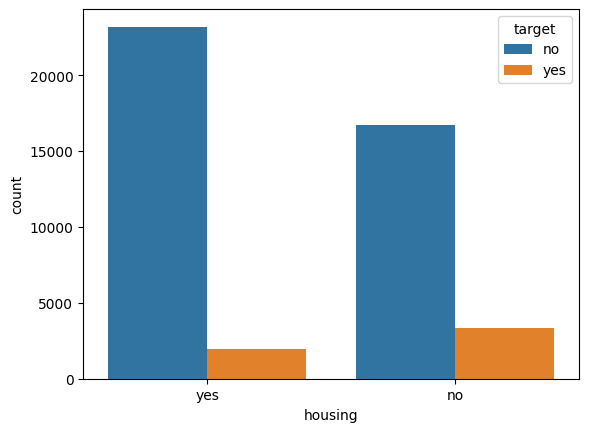

In [56]:
sns.countplot(data=X,x='housing',hue='target')

<Axes: xlabel='loan', ylabel='count'>

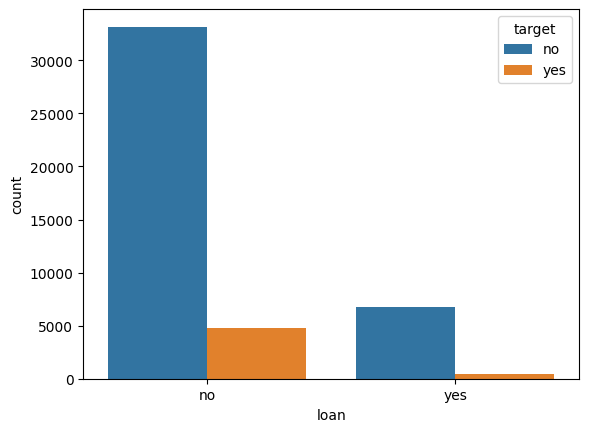

In [57]:
sns.countplot(data=X,x='loan',hue='target')

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>
Those who took the housing and personal loan didn't subscribed the Term Deposit mostly</li>

</ul>
    
</div>

<Axes: xlabel='poutcome', ylabel='count'>

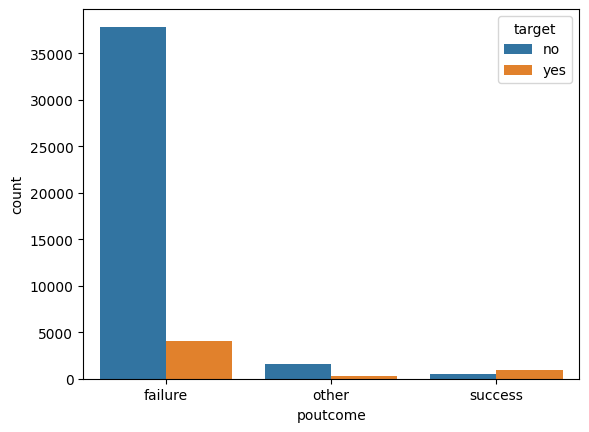

In [58]:
sns.countplot(data=X,x='poutcome',hue='target')

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li> Client who have not subscribed the Term Deposit last time, have not subscribed again
    <li>
This feature has more significant in Predicting the Term Deposit subscription.</li>

</ul>
    
</div>

Check the value_counts for those who taken both the housing and personal loan

In [59]:
X.groupby('housing')[['loan','target']].value_counts().unstack()

target           no   yes
housing loan             
no      no    14069  3135
        yes    2658   219
yes     no    19093  1670
        yes    4102   265

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>
From above Table **Personal Loan** has no significant impact with Target feature, there is some relation with personal loan and target variable</li>
    <li>
less count in the subscription of Term deposit when client have personal loan</li>

</ul>
    
</div>

In [60]:
housing_personal = X[((X['housing'] == "yes") & (X['loan'] == "yes")) | ((X['housing'] == "no") & (X['loan'] == "no"))]

In [61]:
housing_personal

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
4,33,Missing,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no
6,28,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,-1,0,failure,no
20,28,blue-collar,married,secondary,no,723,yes,yes,cellular,5,may,262,1,-1,0,failure,no
22,32,blue-collar,single,primary,no,23,yes,yes,cellular,5,may,160,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no


#### Non-parametic Correlation test - Chi square test for independence
##### Create a Cross Tab b/w categorical variable pair

In [62]:
table = pd.crosstab(X['housing'],X['marital'])

In [63]:
table

marital,divorced,married,single
housing,,,
no,2300,11893,5888
yes,2907,15321,6902


In [64]:
table = pd.crosstab(X['loan'],X['marital'])
table

marital,divorced,married,single
loan,,,
no,4286,22554,11127
yes,921,4660,1663


In [65]:
table = pd.crosstab(X['housing'],X['target'],margins=True)
table

target,no,yes,All
housing,,,
no,16727,3354,20081
yes,23195,1935,25130
All,39922,5289,45211


In [66]:
table = pd.crosstab(X['loan'],X['target'],margins=True)
table

target,no,yes,All
loan,,,
no,33162,4805,37967
yes,6760,484,7244
All,39922,5289,45211


In [67]:
X.groupby('housing')[['loan','target']].value_counts().unstack()

target           no   yes
housing loan             
no      no    14069  3135
        yes    2658   219
yes     no    19093  1670
        yes    4102   265

<Axes: xlabel='month'>

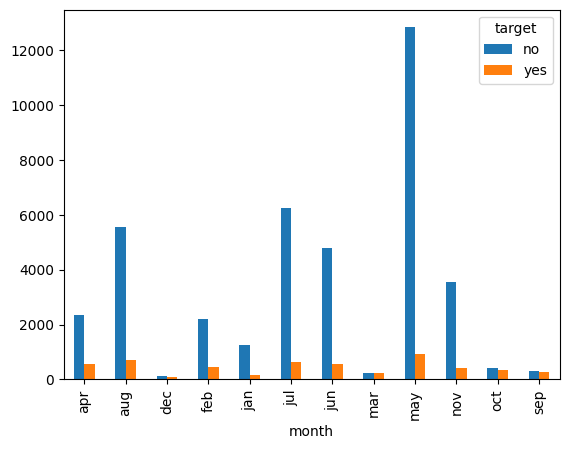

In [68]:
X.groupby('month')[['target']].value_counts().unstack().plot(kind='bar')

-----------------------------------------
<a class="anchor"  id="3.3"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">3.3- Univariate Analysis on Numerical Features 📊</p>

In [69]:
numerical_features = X.select_dtypes(include=['int64'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

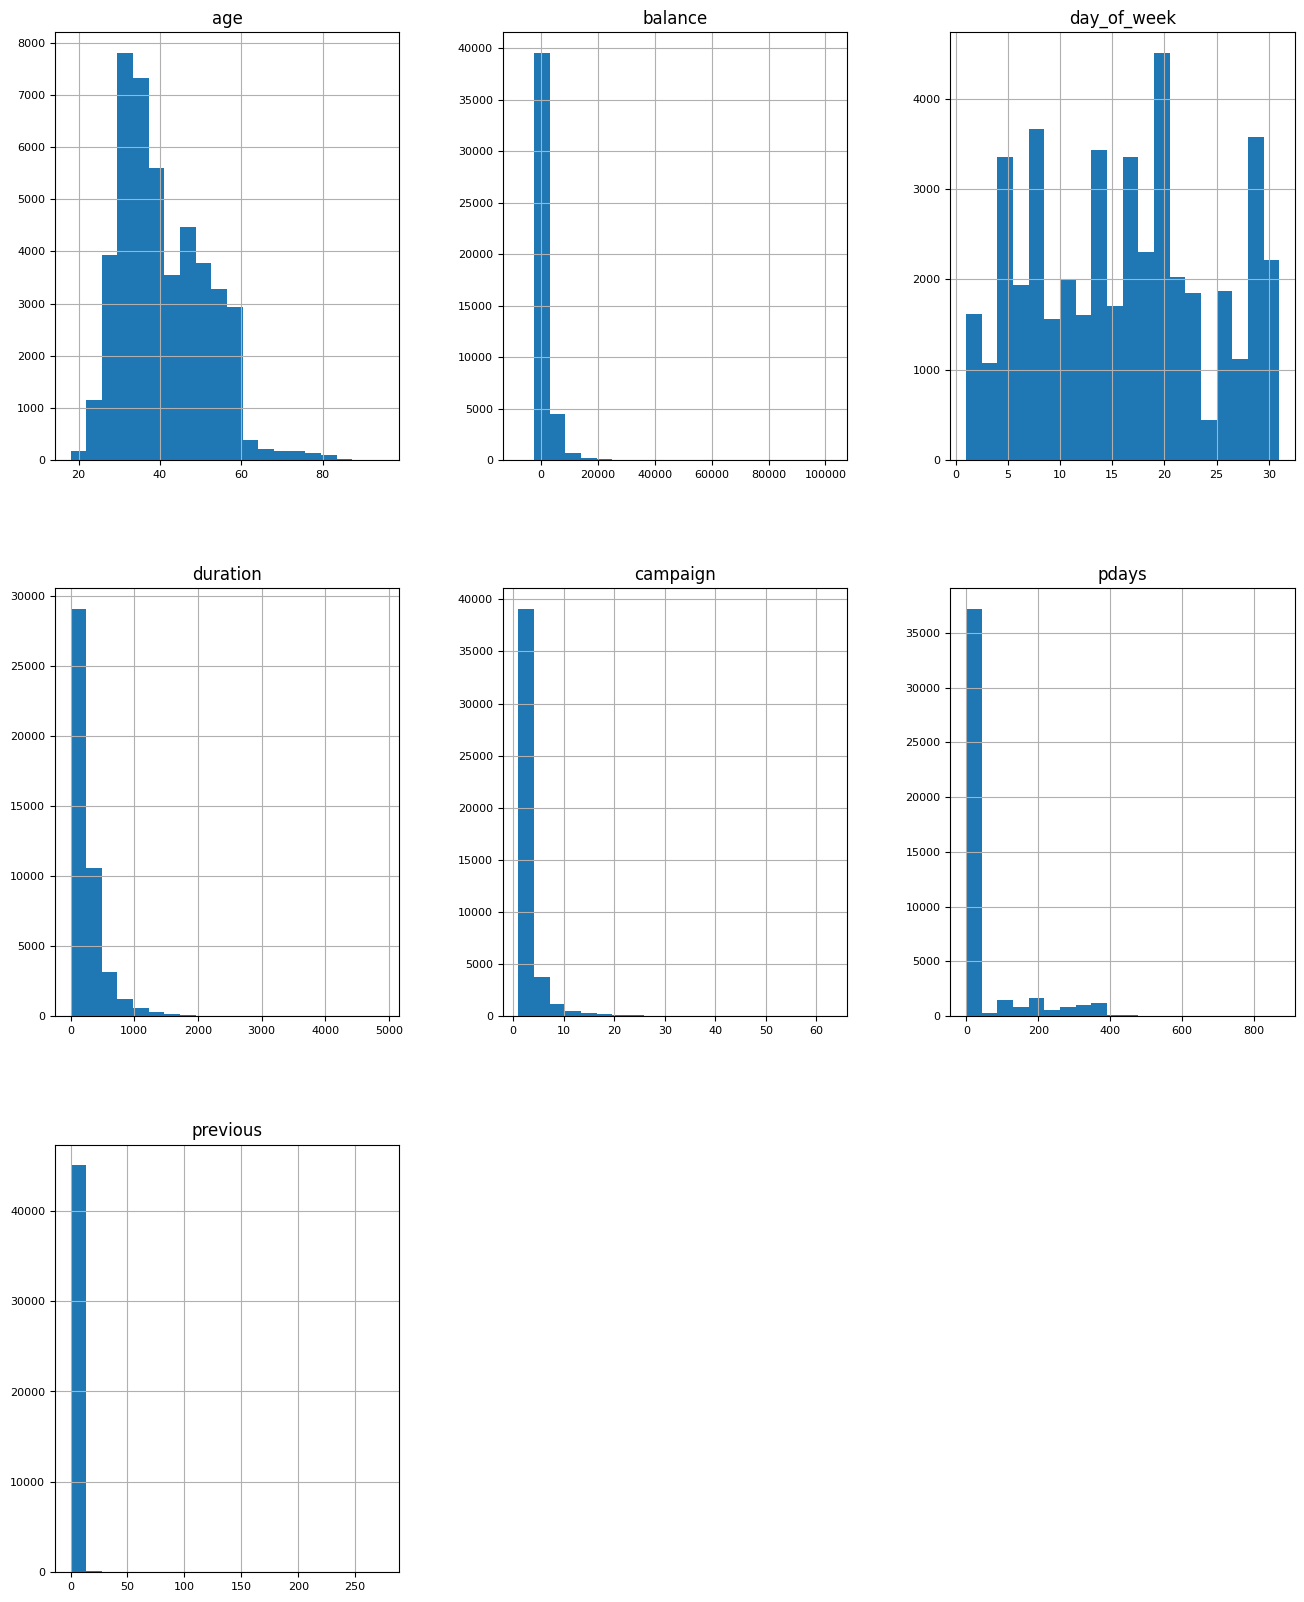

In [70]:
numerical_features.hist(bins=20,figsize=(16,20),xlabelsize=8, ylabelsize=8)

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>From Above Numerical Feature Distribution, its not Normally Distributed </li>
    <li>Since Decision Tree Algorithm Doesn't Require the Normally Distributed Assumptions for data.</li>
    <li>Classification Models, like Decision Tree, Random Forest, XGBoost, these algorithms Decision are non-parametric models, so the assumptions are not underlying on the normal Distribution of Data.</li>
    <li>Infact, decision trees can handle various types of distributions, including skewed distributions or non-normal data.</li>
    <li>They recursively split the data based on certain features and their thresholds, aiming to create subsets that are more homogeneous in terms of the target variable (for classification problems).</li>
    <li> We can Drop the Day_of_week column, it doesn't have significant or necessary feature</li>
</ul>
    
</div>

<a class="anchor"  id="3.4"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        3.4- Bivariate Analysis on Numerical Features 
</h2>

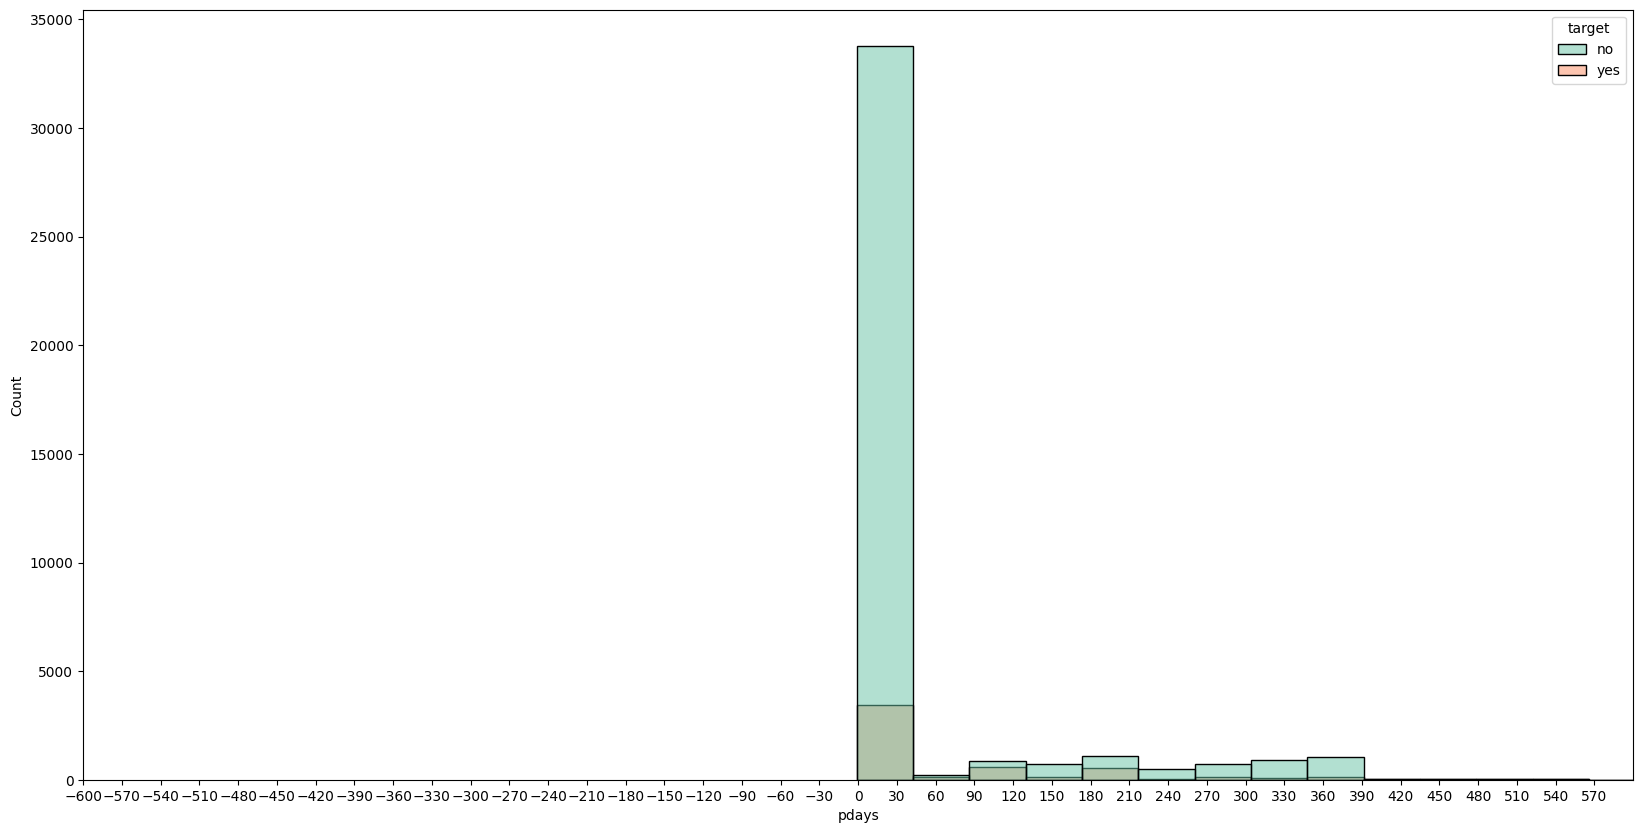

In [71]:
# Check the Pdays Feature - More Detail to get the insights
#sns.distplot(a=X['pdays'],kde=True)
plt.figure(figsize=(20,10))
sns.histplot(data=X,x='pdays',bins=20,hue='target',palette='Set2')
plt.xlim(-600,600)
plt.xticks(range(-600,600,30))
plt.show()

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul><li>Above figure indicates the days that passed after the last campaign</li>
    <li>Range from 0 to 40 within this range days passed after the last campaign are likely to subscribe the Term Deposit</li></ul>
    
</div>

Pdays -> 
* -1 Indicates Client was not contacted previously, 
* So those Clients are New for Term Deposit Campaign

In [72]:
X[X['pdays'] == - 1]['pdays'].value_counts()

pdays
-1    36954
Name: count, dtype: int64

In [73]:
X[X['pdays'] == - 1].target.count()

36954

In [74]:
X[X['pdays'] == - 1].target.value_counts(normalize=True)

target
no     0.908427
yes    0.091573
Name: proportion, dtype: float64

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul><li>So Out of 36954 Newly Contacted Client</li>
    <li>Only 0.09% Subscribed the Term Deposit</li>
    <li>Range from 0 to 10 time Contacted Clients are subscribed</li></ul>

In [75]:
campaign = X[X['pdays'] == - 1]

<Axes: xlabel='campaign', ylabel='Count'>

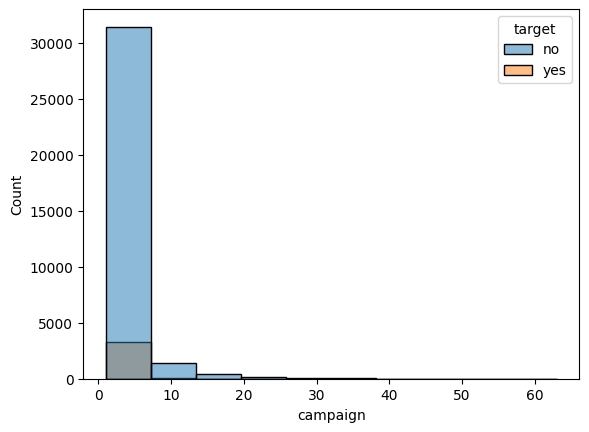

In [76]:
sns.histplot(data=campaign,x='campaign',hue='target',bins=10)

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul><li>So Out of 36954 Newly Contacted Client</li>
    <li>Only 0.09% Subscribed the Term Deposit</li>
    <li>Range from 0 to 10 time Contacted Clients are subscribed</li></ul>

<Axes: xlabel='balance', ylabel='Count'>

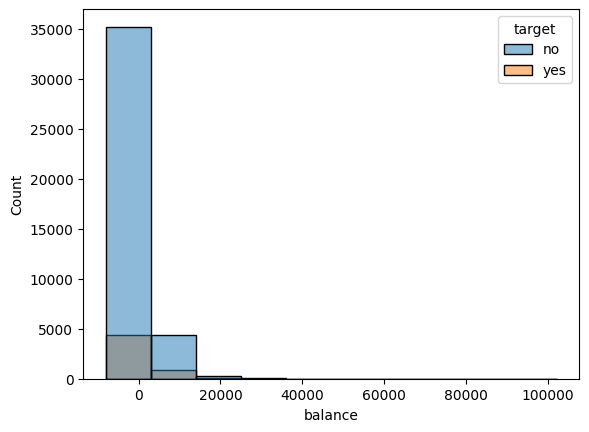

In [77]:
sns.histplot(data=X,x='balance',hue='target',bins=10)

<Axes: xlabel='job'>

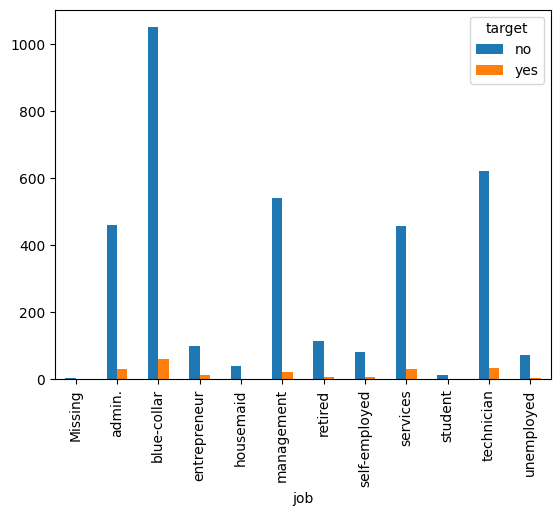

In [78]:
X[X['balance'] < 0].groupby(['job','target'])['balance'].count().unstack().plot(kind='bar')

In [79]:
X[X['balance'] < 0].groupby('job')['balance'].count().to_frame().sort_values('balance',ascending=False)

,balance
job,
blue-collar,1110
technician,656
management,565
admin.,492
services,490
retired,123
entrepreneur,113
self-employed,88
unemployed,74


In [80]:
X[X['balance'] < 0].groupby(['job','target'])['balance'].count().unstack()

target,no,yes
job,,
Missing,4.0,NaN
admin.,461.0,31.0
blue-collar,1051.0,59.0
entrepreneur,100.0,13.0
housemaid,38.0,1.0
management,542.0,23.0
retired,115.0,8.0
self-employed,81.0,7.0
services,458.0,32.0


<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul><li>So 3766 Clients have Negative Balance</li>
    </ul>

<Axes: xlabel='campaign', ylabel='duration'>

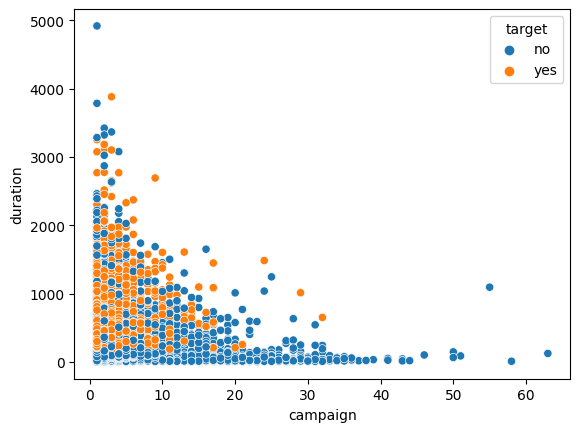

In [81]:
sns.scatterplot(data=X,x='campaign',y='duration',hue='target')

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>Loos like range b/w the 0 to 10 times contacted client have subscribed the Term Deposit as well as contacted duration is range from 0 to 3000 seconds</li>
</ul>
    
</div>

<Axes: xlabel='campaign', ylabel='previous'>

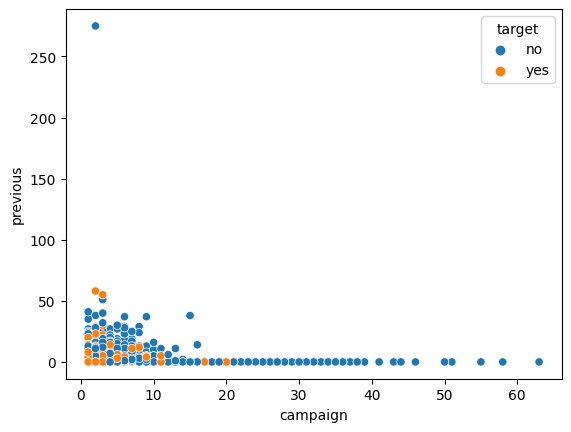

In [82]:
sns.scatterplot(data=X,x='campaign',y='previous',hue='target')

-----------------------------------------
<a class="anchor"  id="4"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">4 - Data Preprocessing ⚒️</p>

<a class="anchor"  id="4.1"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.1- Feature Extraction and its Visualization
</h2>

Generally If you see the Dataset, 
* We can group the Age Column by seeing any pattern following b/w age groups
* We can group the Job Type, because there are more unique job Type - Cardinality is More, so we reducing the cardinality, as well there is no much sample in each category
* And Can check could able to do any Feature Engineering regarding Statistically

<Axes: >

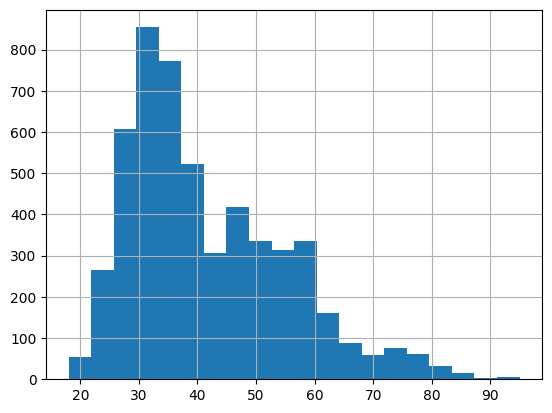

In [83]:
X[X['target'] == 'yes']['age'].hist(bins=20)

 If we Bin the Age Group, we can get some better clarity 
<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>Students age Group is around 20 to 25, won't be do much contribution in Term Deposit Subscription</li>
    <li>Age Group b/w 25 to 35 are the working professional have some contribution</li>
     <li>35 to 45 will have more contribution etc</li>
     <li>From above Histogram plot we can see that age group from 30 to 40 are more</li>
</ul>
    
</div>


In [84]:
## Binning the Age feature
def AgeGroup(x):
    ageGroup_bin = [0,25,35,45,55,65,75,85,100]
    ageGroup_labels = ['0-25','25-35','35-45','45-55','55-65','65-75','75-85','85-100']
    
    ageGroup = pd.cut(x,bins=ageGroup_bin,labels=ageGroup_labels,right=False)
    return ageGroup

In [85]:
X['AgeGroup'] = AgeGroup(X['age'])
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target,AgeGroup
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,55-65
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,35-45
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,25-35
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,45-55
4,33,Missing,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,45-55
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,65-75
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,65-75
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no,55-65


In [86]:
X['AgeGroup'].value_counts()

AgeGroup
35-45     14534
25-35     14204
45-55      9958
55-65      4896
0-25        809
65-75       510
75-85       268
85-100       32
Name: count, dtype: int64

In [87]:
Age_Group_dic = {
    '0-25': 0, '25-35': 1,
    '35-45': 2, '45-55': 3,
    '55-65': 4, '65-75': 5,
    '75-85':6, '85-100':7
}

In [88]:
#age_group_encode = X['AgeGroup'].map(Age_Group_dic)
#age_group_encode
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['AgeGroup'] = labelencoder.fit_transform(X['AgeGroup'].map(Age_Group_dic))

In [89]:
nomial_categorical = ['job','marital','education','default','housing','loan','contact','poutcome']
for categorical in nomial_categorical:
    labelencoder = LabelEncoder()
    X[categorical] = labelencoder.fit_transform(X[categorical])

<a class="anchor"  id="4.2"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.2- Handling Outliers 
</h2>

<ul>
    <li>
        Handling Outliers In the Dataset, 
    </li>
    <li>
        Actually In this dataset, some untrended pattern can also be there, We should not treat that as Outliers 
    </li>
    <li> 
        They are the meaningful variations
    </li>
</ul>

<Axes: title={'center': 'duration'}, xlabel='target'>

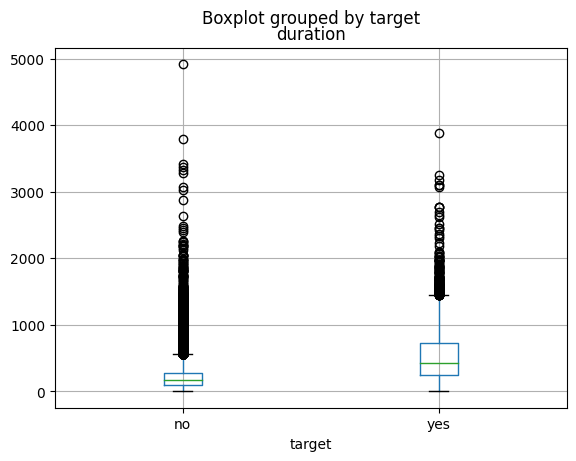

In [90]:
## Check the Box Plots for 
X[['duration','target']].boxplot(column='duration',by='target')

<Axes: title={'center': 'balance'}, xlabel='target'>

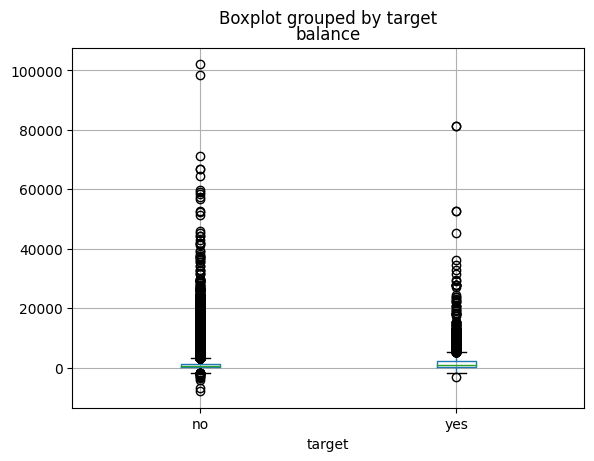

In [91]:
X[['balance','target']].boxplot(column='balance',by='target')

<Axes: title={'center': 'pdays'}, xlabel='target'>

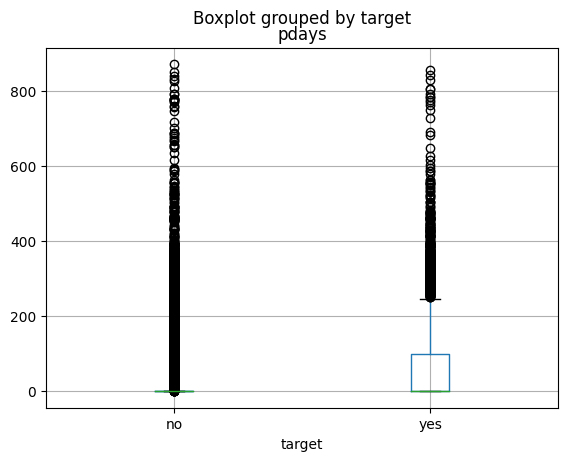

In [92]:
X['pdays'].value_counts()
X[['pdays','target']].boxplot(column='pdays',by='target')

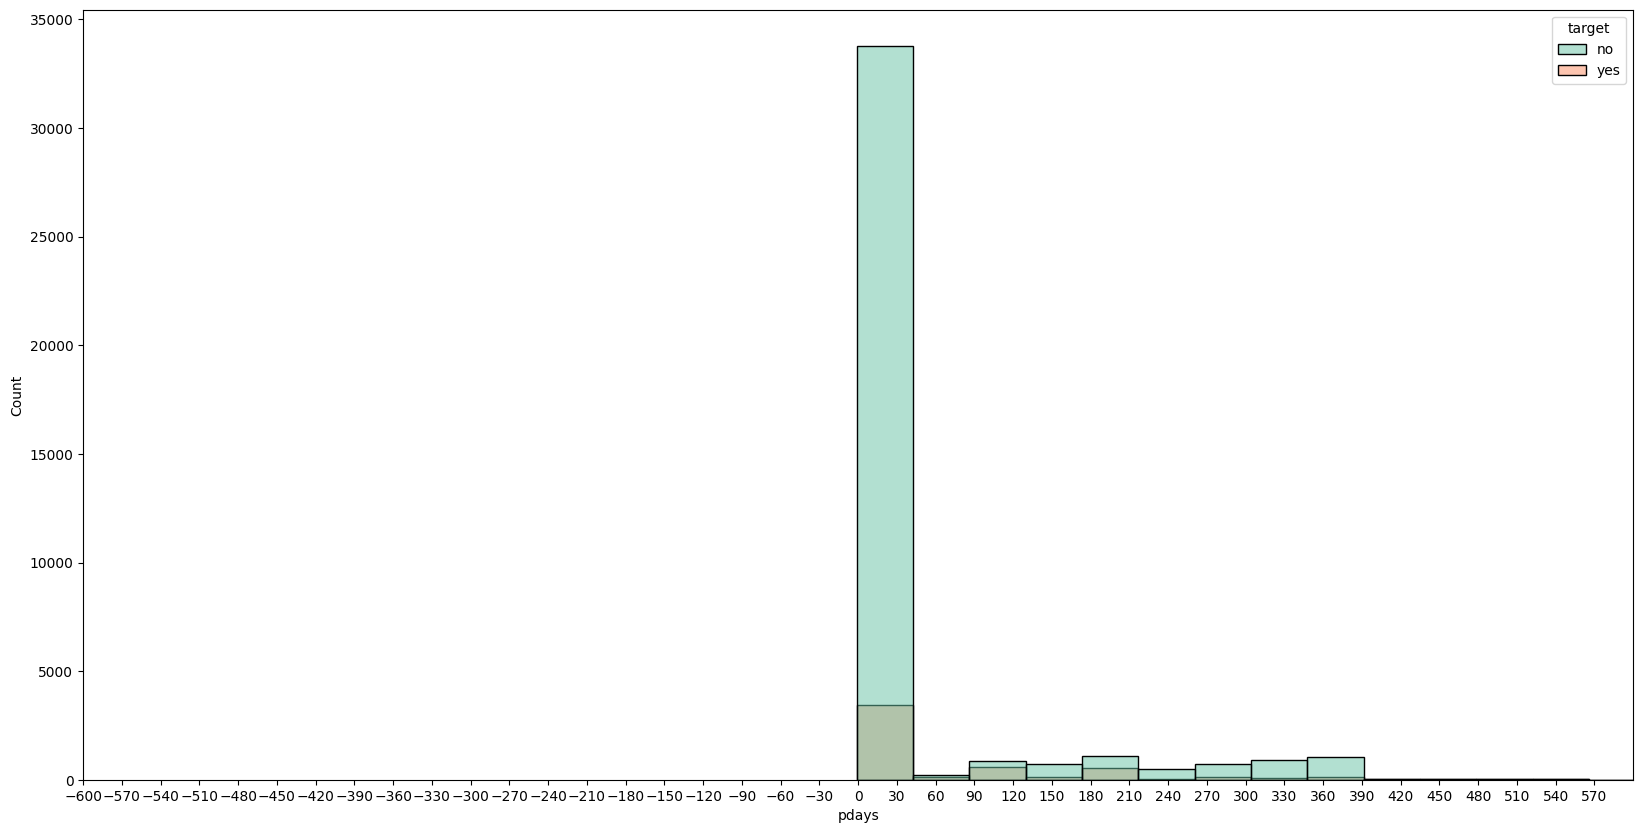

In [93]:
plt.figure(figsize=(20,10))
sns.histplot(data=X,x='pdays',bins=20,hue='target',palette='Set2')
plt.xlim(-600,600)
plt.xticks(range(-600,600,30))
plt.show()

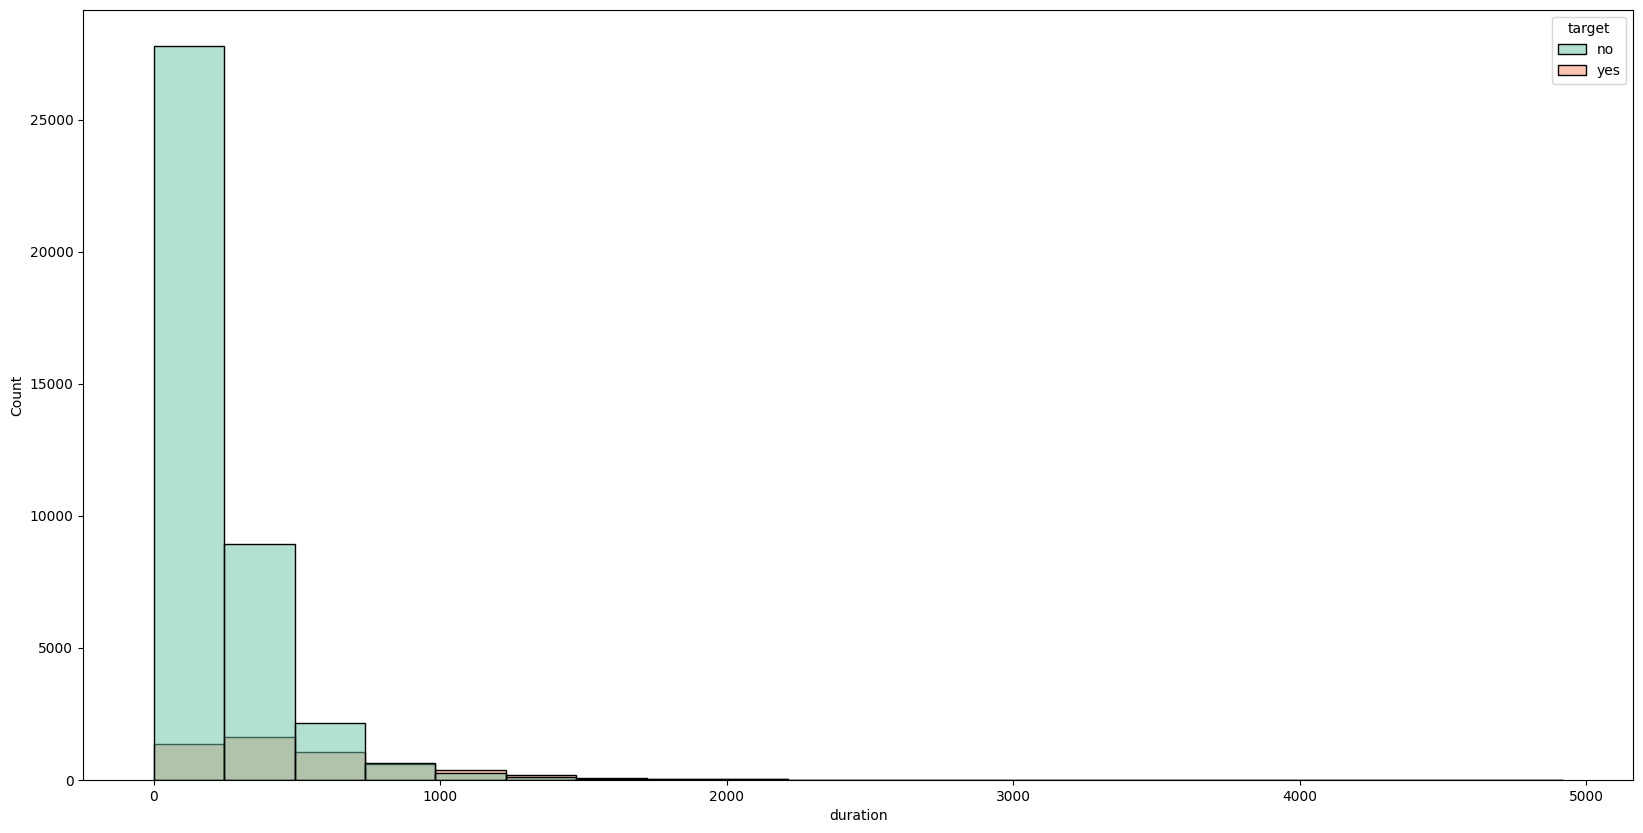

In [94]:
plt.figure(figsize=(20,10))
sns.histplot(data=X,x='duration',bins=20,hue='target',palette='Set2')
#plt.xlim(-600,600)
#plt.xticks(range(-600,600,30))
plt.show()

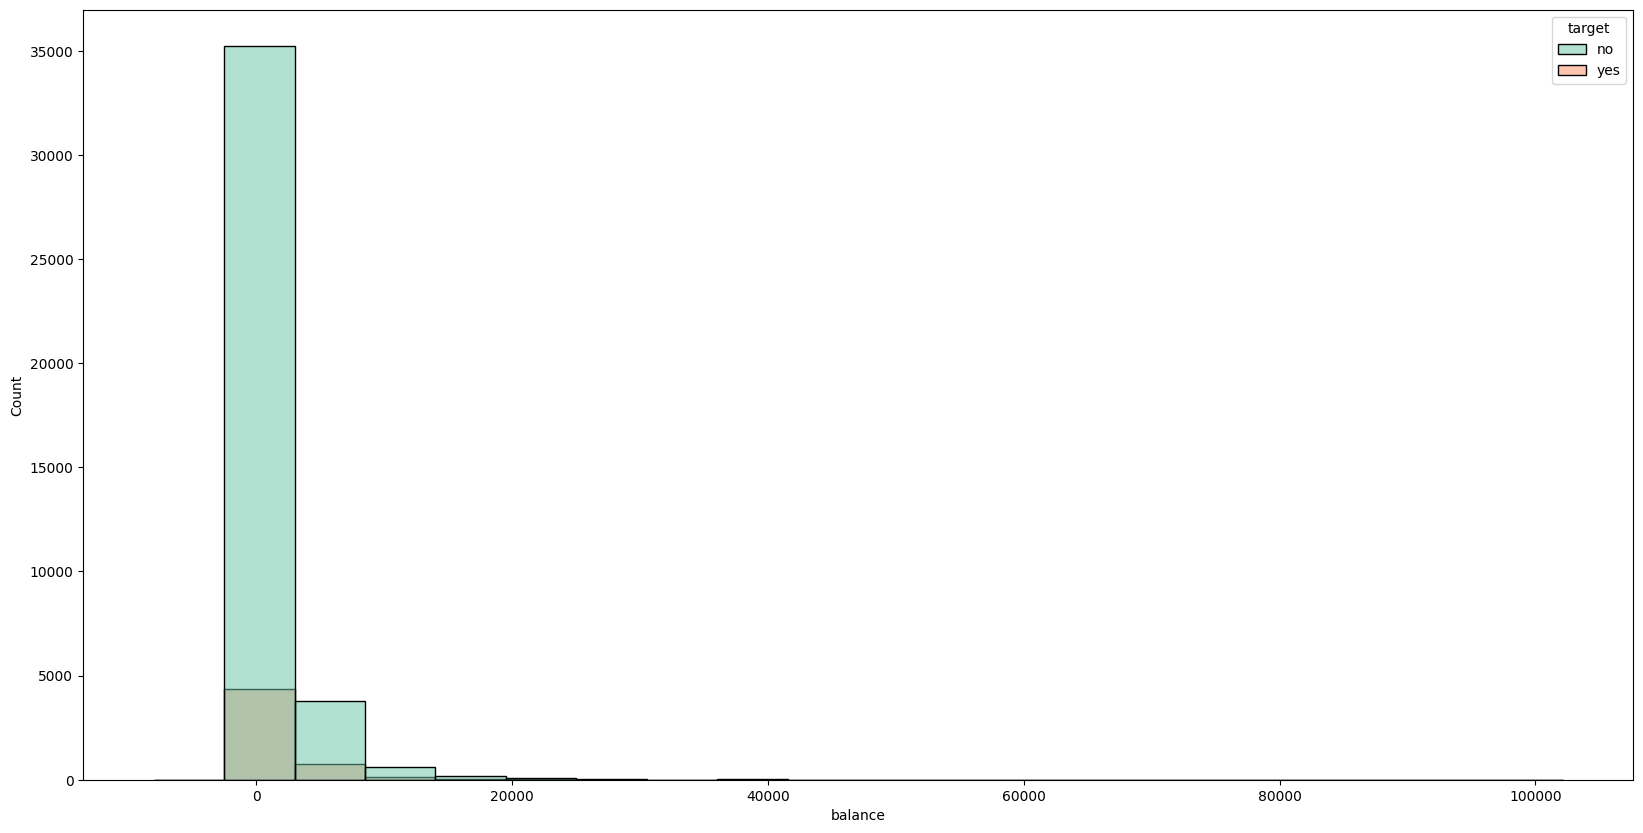

In [95]:
plt.figure(figsize=(20,10))
sns.histplot(data=X,x='balance',bins=20,hue='target',palette='Set2')
#plt.xlim(-600,600)
#plt.xticks(range(-600,600,30))
plt.show()

 If we Bin the Age Group, we can get some better clarity 
<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>If you see the Above Three Box plots on Duration, Balance, Pdays and the Histogram plots, These are good predictors to categorize but seems there is imbalance in data</li>
    <li>We don't need any Transformation of these features to get back it normal Distribution</li>
    <li>But we balance the dataset based these features along with Target variable</li> 
</ul>
    
</div>

## Let's test the Outliers, How many Outliers Its Detecting, But Those Variations are the meaningful

In [96]:
numeric_features = ['pdays','duration','balance']
X_outliers = detect_outliers(X, features=numeric_features, n=0)
outliers = len(X_outliers)
print(outliers)

14376


<a class="anchor"  id="4.3"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.3- Data Split to Train and Test Sets
</h2>

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [98]:
## First Drop the unwanted columns
X.drop(columns = ['day_of_week','month'],inplace=True)

In [99]:
X.drop(['target'],inplace=True,axis=1)

In [100]:
X

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,AgeGroup
0,58,5,1,2,0,2143,1,0,0,261,1,-1,0,0,4
1,44,10,2,1,0,29,1,0,0,151,1,-1,0,0,2
2,33,3,1,1,0,2,1,1,0,76,1,-1,0,0,1
3,47,2,1,1,0,1506,1,0,0,92,1,-1,0,0,3
4,33,0,2,1,0,1,0,0,0,198,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,1,2,0,825,0,0,0,977,3,-1,0,0,3
45207,71,6,0,0,0,1729,0,0,0,456,2,-1,0,0,5
45208,72,6,1,1,0,5715,0,0,0,1127,5,184,3,2,5
45209,57,2,1,1,0,668,0,0,1,508,4,-1,0,0,4


In [101]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [102]:
X.shape, y.shape

((45211, 15), (45211, 1))

In [103]:
y['y'] = y['y'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_19/3066529262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].replace({'yes': 1, 'no': 0})


In [104]:
# Then we Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.30, 
                                                    random_state=42,
                                                    stratify=y)

In [105]:
print(f'Observations on Training Set {X_train.shape[0]}')
print(f'Observations on Testing  Set {X_test.shape[0]}')

Observations on Training Set 31647
Observations on Testing  Set 13564


 
<a class="anchor"  id="4.4"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.4- Handling Imbalanced Data
</h2>

<Axes: xlabel='y'>

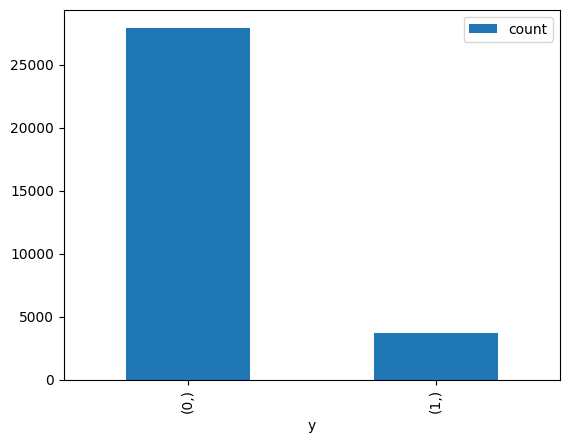

In [106]:
y_train.value_counts().to_frame().plot(kind='bar')

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Insight💡</strong><br>
    
<ul>
    <li>If you see the Target variable, One class is significantly underrepresented compared to another class
</li>
    <li> Our Aim is to Balance the Distribution b/w these two classes</li>
</ul>
  
</div>

<div style="border: 2px solid #000; border-radius: 10px; padding: 10px; margin-bottom: 10px; font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
<strong>Balancing the Target Variable Distribution💡</strong><br>
    
<ul>
    <li>There are Two techniques to overcome this, OverSampling and UnderSampling Technique
</li>
    <li> In Our Dataset the positive class observations are too less, So we will Use the Oversampling Technique to increase the positive class observation by producing the synthetic samples or by reproducing the existing samples</li>
    <li> SMOTE (Synthetic Minority Over-sampling Technique)</li>
    <li> This Technique will create synthetic samples by interpolating between existing minority class instances
</ul>
  
</div>

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [109]:
print(f'Observations on Training Set {X_train.shape[0]}')

Observations on Training Set 55890


In [110]:
pd.concat([X_train,y_train])['y'].value_counts()

y
0.0    27945
1.0    27945
Name: count, dtype: int64

<a class="anchor"  id="4.5"></a>
<h2 style="font-family: 'OCR A Extended', sans-serif; color: Black;  margin-top: 9px; margin-bottom: 9px;  letter-spacing: 2px;">
        4.5- Feature Scaling
</h2>

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
## Use the Standard Scaler to Standardize the Features

In [113]:
numerical_features = X[['age','balance','duration','campaign','pdays','previous']]

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

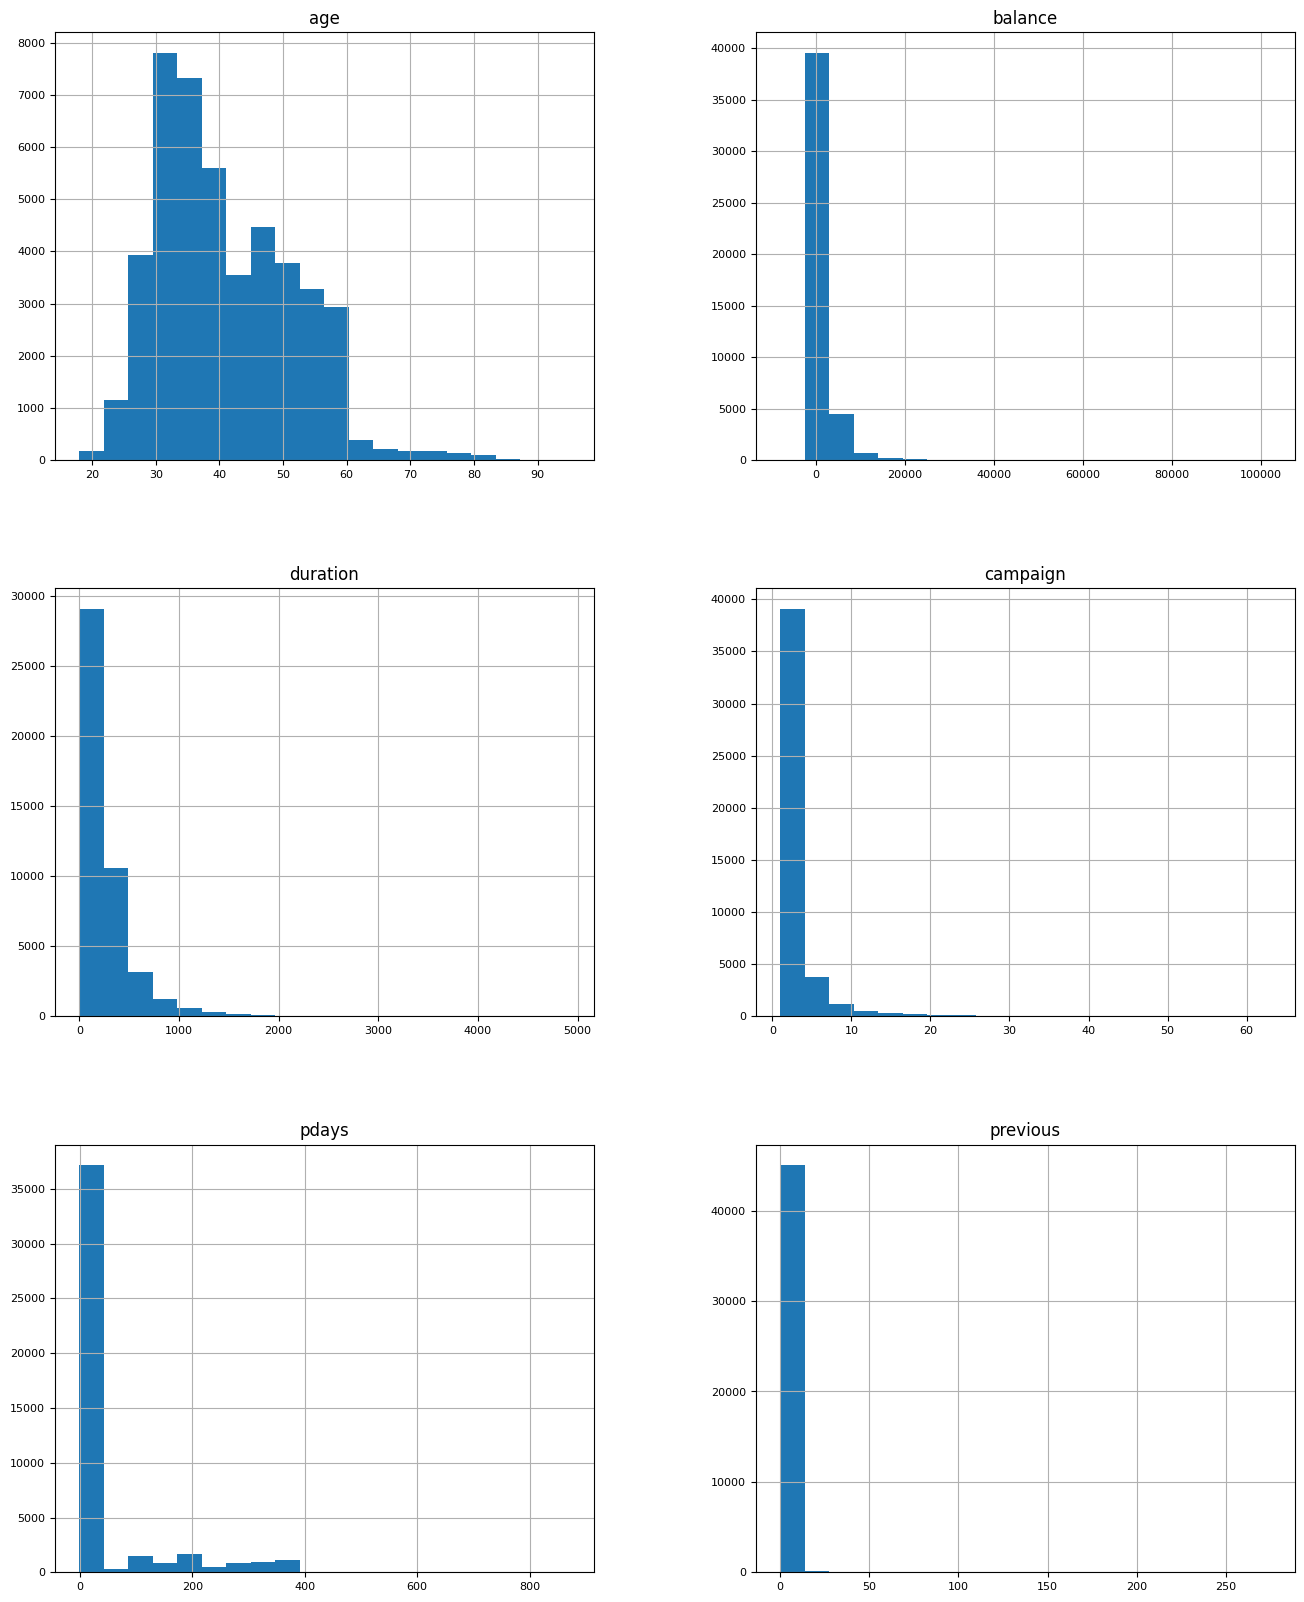

In [114]:
#Before Standardizing the Numerical Features
numerical_features.hist(bins=20,figsize=(16,20),xlabelsize=8, ylabelsize=8)

In [115]:
# Creating a StandardScaler instance
scaler = StandardScaler()
# Fitting the StandardScaler on the training data
scaler.fit(X_train[numerical_features.columns])
X_train_numerical = scaler.transform(X_train[numerical_features.columns])
X_test_numerical = scaler.transform(X_test[numerical_features.columns])
# Replacing the scaled continuous features in the original data
X_train[numerical_features.columns] = X_train_numerical
X_test[numerical_features.columns] = X_test_numerical

In [116]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,AgeGroup
0,-0.895710,8,1,1,0,-0.480167,1,0,0,-0.846841,-0.519062,-0.483413,-0.319781,0,1
1,-0.529489,8,1,1,0,-0.420773,1,0,0,-0.501955,-0.519062,-0.483413,-0.319781,0,2
2,-1.536597,2,2,1,0,-0.456899,1,0,0,-0.407895,-0.134043,-0.483413,-0.319781,0,0
3,-0.529489,2,1,1,0,-0.455981,1,1,0,0.569759,-0.134043,-0.483413,-0.319781,0,2
4,-0.346378,8,2,1,0,-0.448327,0,1,0,-0.519056,-0.134043,1.023126,1.364484,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55885,-0.804155,5,1,2,0,-0.326171,0,0,0,-0.889596,-0.519062,-0.426202,-0.319781,0,1
55886,-0.254823,3,1,0,0,0.263786,0,0,0,1.980658,-0.519062,-0.483413,-0.319781,0,1
55887,-0.895710,9,1,2,0,-0.285759,0,0,0,-0.077260,0.250975,-0.483413,-0.319781,0,1
55888,-1.170376,8,2,0,0,-0.339336,0,0,0,-0.248278,0.635993,2.510595,0.522351,1,0


In [117]:
numerical_features = X_train[['age','balance','duration','campaign','pdays','previous']]

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

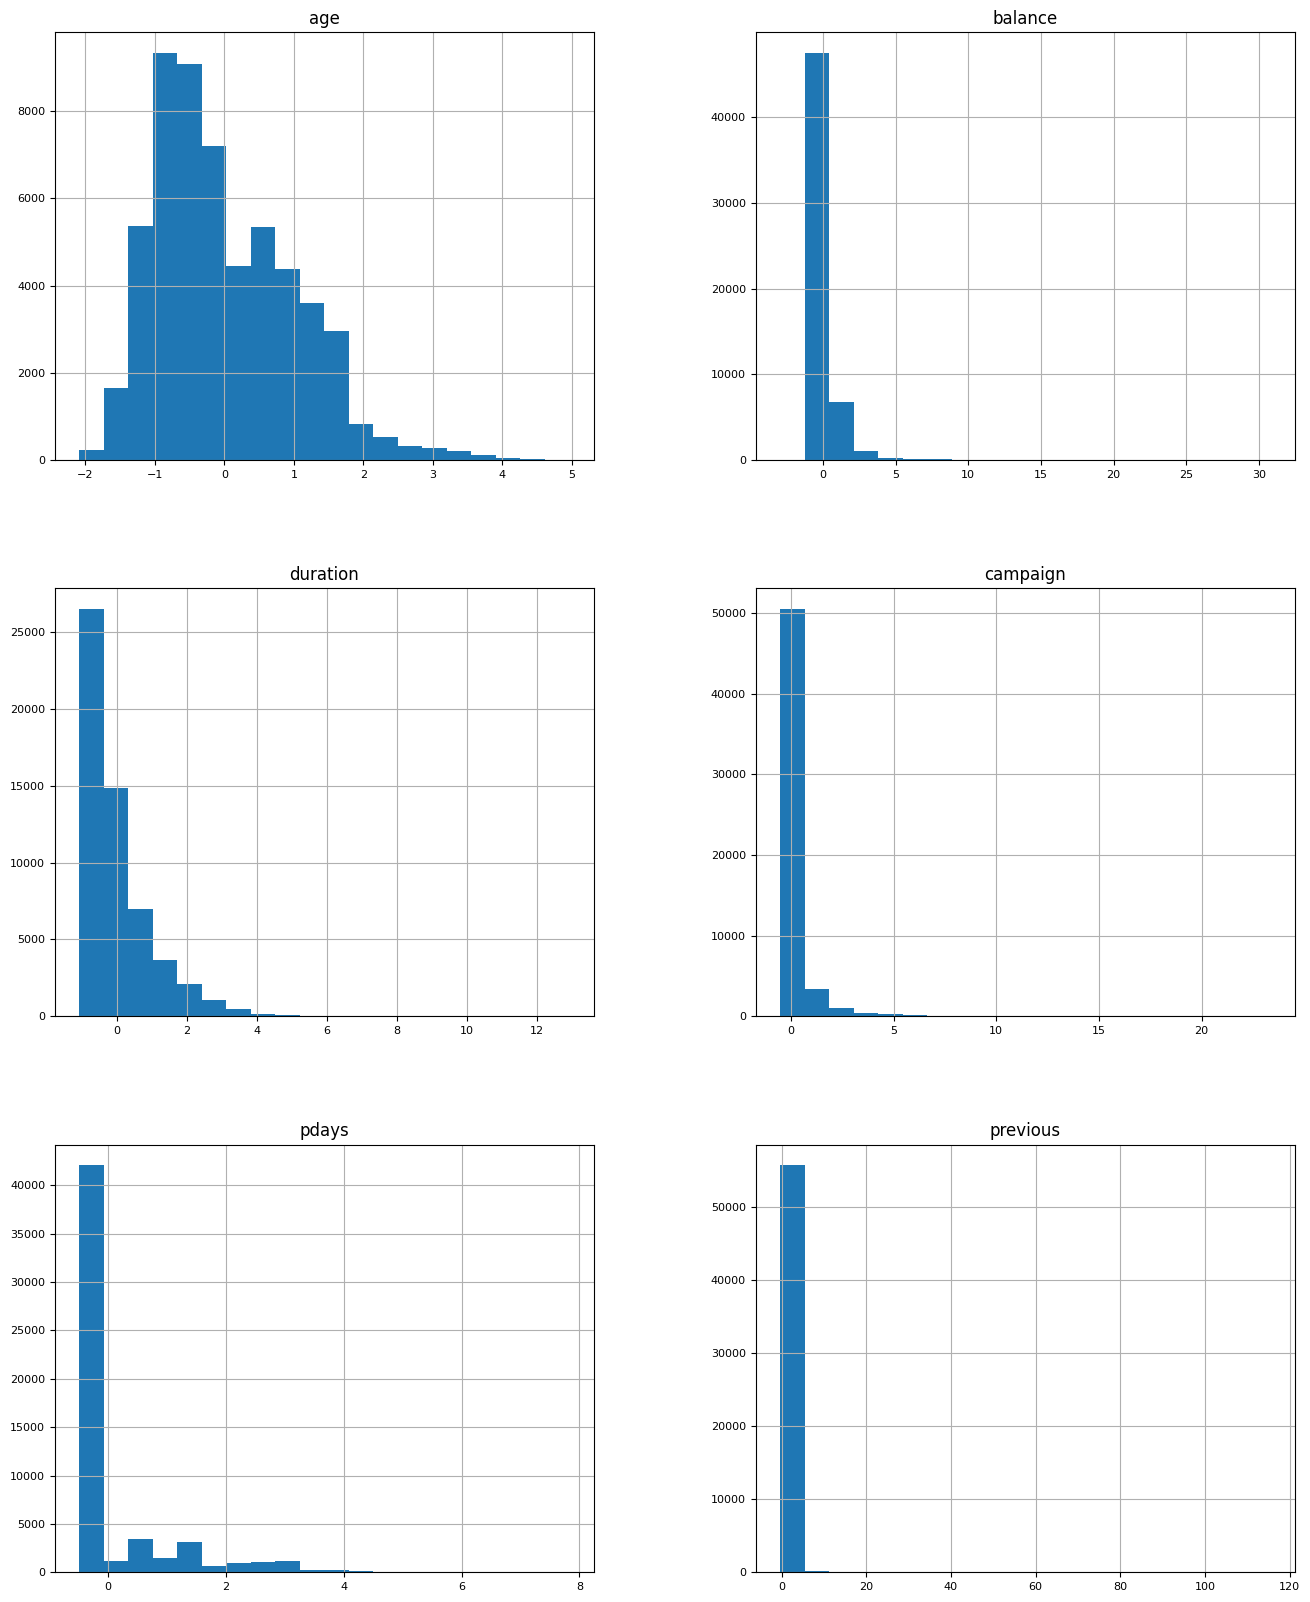

In [118]:
numerical_features.hist(bins=20,figsize=(16,20),xlabelsize=8, ylabelsize=8)

-----------------------------------------
<a class="anchor"  id="5"></a>
# <p style="color:Black;font-family:'OCR A Extended', sans-serif; font-size:100%; margin-top: 9px; margin-bottom: 9px;overflow:hidden;font-weight:300; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); letter-spacing: 2px;">5- Models Training and Evaluation ⚙️</p>

* First Will use the Decision Tree and Random Forest for Classifying
and use several other Classification Methods like 

* AdaBoost
* Gradient Boosting
* XGBoost
* LightGBM
* CatBoost

* Gaussian Naive Bayes 
* > Naive Bayes is Something different from other algorithm, because it uses the Conditional Probability.
* > It assumes that all features are independent of each other given the class label(It's a strong assumption and might not hold true in many practical scenarios.)
* Logistic Regression
* KNN



<div style="border: 2px solid darkblue; border-radius: 10px; padding: 10px;">
    <span style="font-family: 'Cambria', sans-serif; font-size: 16px; line-height: 1.5;">
        <li>First will use the Decision Tree and Random Forest to Predict the Classification on the Training and Test Set</li>
        <li>Then will Use the Cross Fold validation to Evaluate the Performance of Various Fold in all other Classification Algorithm</li>
    </span>
</div>

### Decision Tree
##### Assumptions
* No Need to be Normally Distributed - Satisfied


In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score

### First Version of the Decision Tree

In [120]:
### First Version of the Decision Tree Classifier
decision_clf = DecisionTreeClassifier(random_state=42)
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [121]:
### Prediction with Training Data
y_pred_train = decision_clf.predict(X_train)
print(y_pred_train)
##Check the Accuracy Score in the Training Data
print("Accuracy Score for Training Data", accuracy_score(y_train,y_pred_train)*100)

[0 0 0 ... 1 1 1]
Accuracy Score for Training Data 100.0


In [122]:
y_pred_test = decision_clf.predict(X_test)
print(y_pred_test)
##Check the Accuracy Score in the Training Data
print("Accuracy Score for Testing Data", accuracy_score(y_test,y_pred_test)*100)

[1 0 1 ... 0 0 0]
Accuracy Score for Testing Data 83.13919197876733


#### Second Version of Decision Tree
* Tweak Some Parameters 
* > Criterion -> Gini
* > min_samples_leaf -> 5

In [123]:
decision_clf1 = DecisionTreeClassifier(criterion="gini",random_state=42,min_samples_leaf=5)
decision_clf1.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [124]:
y_pred_train = decision_clf1.predict(X_train)
print(y_pred_train)
##Check the Accuracy Score in the Training Data
print("Accuracy Score for Training Data", accuracy_score(y_train,y_pred_train)*100)

[0 0 0 ... 0 1 1]
Accuracy Score for Training Data 94.15637860082305


In [125]:
y_pred_test = decision_clf1.predict(X_test)
print(y_pred_test)
##Check the Accuracy Score in the Training Data
print("Accuracy Score for Testing Data", accuracy_score(y_test,y_pred_test)*100)

[1 0 1 ... 0 0 0]
Accuracy Score for Testing Data 83.5520495429077


### Author : Sivaraj Sankar 
##### (Aspiring Data Scientist & Machine Learning Ops Engineer and Doing Intern)